# Visualisation of reproduced results

In [76]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

## load data

In [77]:
# os.listdir()

In [242]:
path_to_results = "server_results/maze_trpo/"
file_name = "progress.csv"

data = np.array([])
num_runs = 5
for run in range(num_runs):
    file_path = path_to_results + "000" + str(run+1) + "/" + file_name
    with open(file_path, 'r') as csvfile:
        data_file = csv.reader(csvfile, delimiter=',', quotechar='|')

        file_content = []
        for row in data_file:
            file_content.append(row)
        
  


        column_titles = file_content[0]
        # print(column_titles)
        
        
        reordering = [column_titles.index('Outer_iter'),
                      column_titles.index('Outer_Success'),
                      column_titles.index('Outer_MeanRewards'),
                      column_titles.index('GenGoal_frac_High rewards'),
                      column_titles.index('GenGoal_frac_Other'),
                      column_titles.index('GenGoal_frac_Good goals'),
                      column_titles.index('GenGoal_frac_Performance Variation'),
                      column_titles.index('GenGoal_frac_Low rewards')]
        print(reordering)
        
        file_data = np.array([])
        for row in file_content[1:]:
            # print(np.array([float(i) for i in row]).shape)
            if(file_data.shape == (0,)):
                file_data = np.array([float(i) for i in row])
            else:
                file_data = np.vstack((file_data, np.array([float(i) for i in row])))
                
        
        ### reordering ###
        print("before reordering:", file_data[0,1:10])
        file_data[:, reordering[0]], file_data[:, reordering[1]], file_data[:, reordering[2]], file_data[:, reordering[3]], file_data[:, reordering[4]], file_data[:, reordering[5]], file_data[:, reordering[6]], file_data[:, reordering[7]] = file_data[:, 0], file_data[:, 1], file_data[:, 2], file_data[:, 3], file_data[:, 4], file_data[:, 5], file_data[:, 6], file_data[:, 7].copy()
        print("after reordering:", file_data[0,1:10])
    
        
    # print(data.shape)
    # print(file_data.shape)
    
    if(data.shape == (0,)):
        data = np.array([file_data])
    else:
        data = np.vstack((data, [file_data]))

[4, 7, 1, 2, 3, 0, 5, 6]
before reordering: [0.04289216 0.01       0.         1.         0.         0.89333333
 0.04289216]
after reordering: [0.01       0.         0.09666667 0.09666667 0.89333333 0.04289216
 0.04289216]
[0, 2, 1, 7, 6, 3, 4, 5]
before reordering: [0.00857843 0.00857843 0.01666667 0.         0.98333333 0.
 0.        ]
after reordering: [0.00857843 0.00857843 0.98333333 0.         0.         0.
 0.01666667]
[2, 7, 6, 5, 0, 4, 1, 3]
before reordering: [0.         1.         0.70333333 0.16       0.13666667 0.17769608
 0.17769608]
after reordering: [0.         0.         0.17769608 0.70333333 0.70333333 0.
 0.        ]
[1, 4, 5, 7, 0, 2, 6, 3]
before reordering: [1.         0.15666667 0.81333333 0.08088235 0.08088235 0.
 0.03      ]
after reordering: [0.         0.15666667 0.03       0.         0.15666667 0.
 0.81333333]
[1, 2, 7, 0, 6, 4, 3, 5]
before reordering: [1.         0.00735294 0.         0.         0.99       0.
 0.00735294]
after reordering: [0.01       0.01  

In [252]:
def reorder_array(array, order):
    array[:, order[0]], array[:, order[1]], array[:, order[2]], array[:, order[3]], array[:, order[4]], array[:, order[5]], array[:, order[6]], array[:, order[7]] = [array[:, 0], array[:, 1], array[:, 2], array[:, 3], array[:, 4], array[:, 5], array[:, 6], array[:, 7]].copy()
    return array

a = np.array([[0, 1, 2, 3, 4, 5, 6, -1], [0, 1, 2, 3, 4, 5, 6, -1]])
b = [7, 5, 2, 3, 4, 7, 6, 6]

c = reorder_array(a, b)
print(c)

[[0 1 2 3 4 1 1 1]
 [0 1 2 3 4 1 1 1]]


In [180]:
print(data[0,:,:])

[[0.09666667 0.04289216 0.01       ... 0.         0.89333333 0.04289216]
 [0.14666667 0.06617647 0.01       ... 0.         0.84333333 0.06617647]
 [0.09       0.03553922 0.00333333 ... 0.         0.90666667 0.03553922]
 ...
 [0.         0.85416667 0.83666667 ... 0.         0.16333333 0.85416667]
 [0.         0.85294118 0.87       ... 0.         0.13       0.85294118]
 [0.00666667 0.85539216 0.86666667 ... 0.         0.12666667 0.85539216]]


In [130]:
print(data)

[]


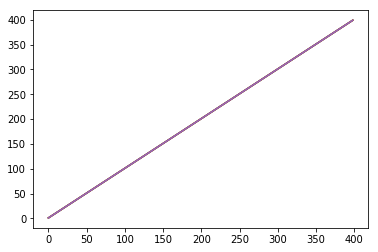

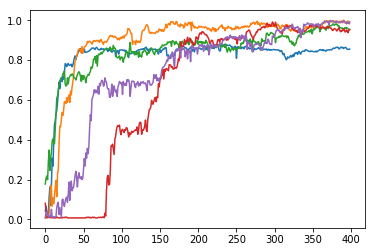

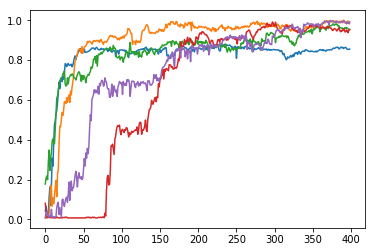

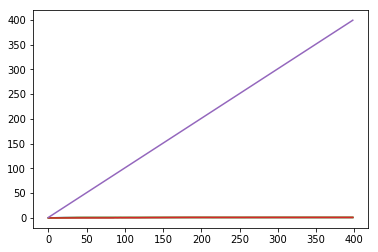

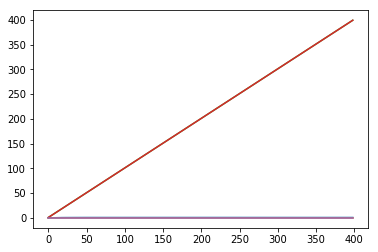

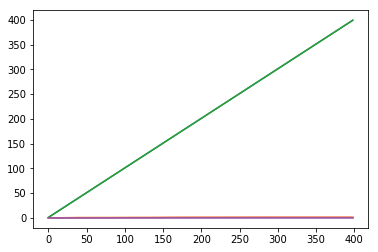

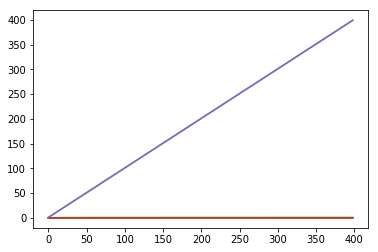

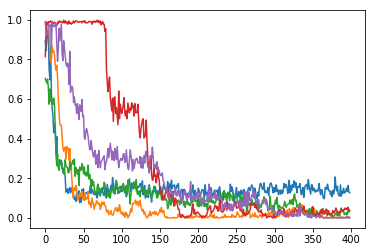

In [198]:
num_runs = 5
iteration_per_run = 399
stat_types = 8

for stat_type in range(stat_types):
    for run in range(num_runs):
        plt.plot(range(iteration_per_run), data[run, :, stat_type])
    plt.show()